# Step 1: importing the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df=pd.read_csv("fashion-mnist_train.csv", sep=',')

In [3]:
fashion_test_df=pd.read_csv('fashion-mnist_test.csv', sep=',')

In [4]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 2: Visualising the data 

In [39]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
fashion_train_df.shape

(60000, 785)

In [84]:
#crete testing and training array so we can actually explore these arrays and actually view or visualize the data 
training = np.array(fashion_train_df,dtype='float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
testing = np.array(fashion_test_df,dtype='float32')

3.0

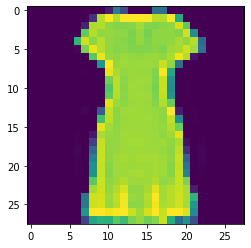

In [43]:
import random
i=random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))   #to reshape our img into 28X28 matrix    here 1: coz we want to skip label column
label = training [i,0]     #for indicating label
label

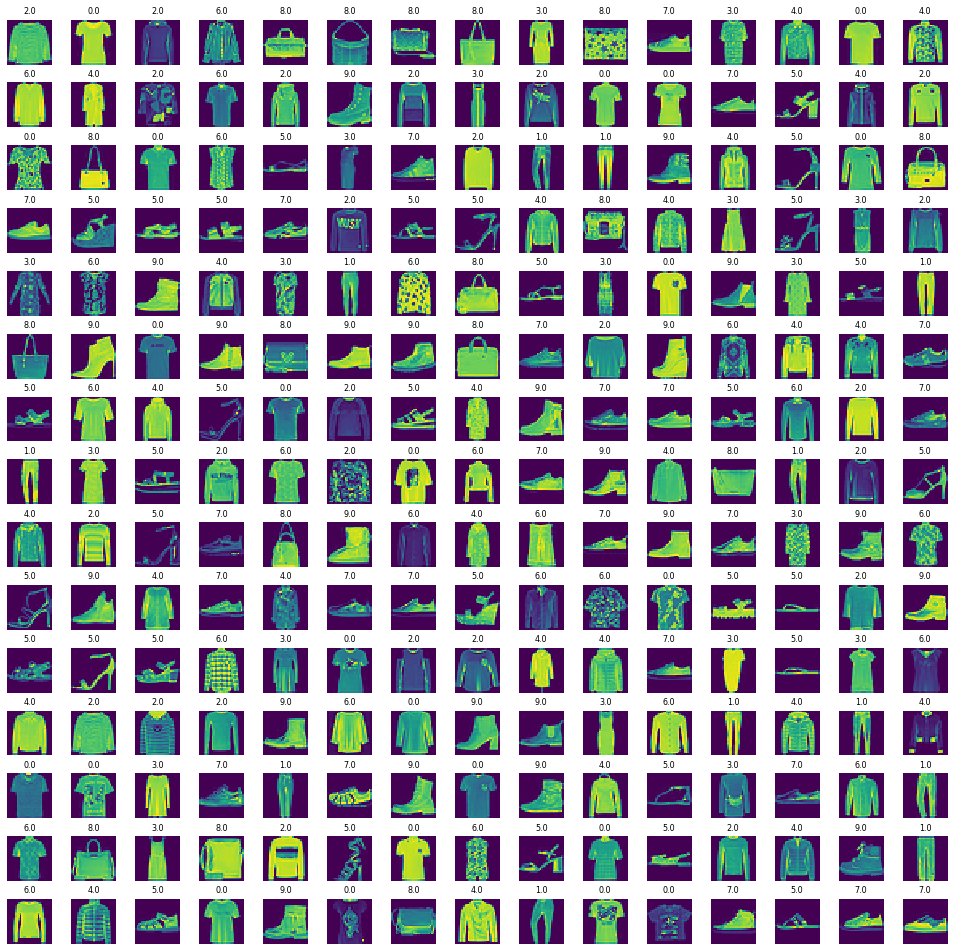

In [44]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
    
#fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
    
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array\n",    255 greyscale 0 for black and 255 for white
    
n_training = len(training) # get the length of the training dataset\n",
    
# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables \n",

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index 
    axes[i].imshow( training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)              #label
    axes[i].axis('off') #not to show the pixels at the axes
    
plt.subplots_adjust(hspace=0.4)   #distance of heigth 4  b/w data

# Step 3: Training the Model


In [45]:
X_train=training[:,1:]/255                # /255 for normalization
y_train=training[:,0]

In [46]:
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [47]:
#Validation dataset is a dataset that we used during training but it can be used to help the model generalize simply we want the model 
#to avoid overfitting .

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [50]:
#now we want to take our training testing and validating dataset into and put them in a form that we can actually feed to our deep network 
#now we have our data in a form of array format or matrix format now we need to reshape our data to be in a form of 28X28X1

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [51]:
X_train.shape

(48000, 28, 28, 1)

In [52]:
X_test.shape

(10000, 28, 28, 1)

In [53]:
X_validate.shape

(12000, 28, 28, 1)

In [56]:
import keras
from keras.models import Sequential #so that we can build our network sequentiallly i.e. convolutional layer first then feature may and so on
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout #used to make the step i.e. convolution step in which we add the convolutional layer we use 2D coz images are in 2D whereas in case of videos we use 3D 
#from keras.layers import MaxPooling2D #step 2 that will add our pooling layer
#from keras.layers import Flatten #step 3 in which we convert our pooled feature map into vector which will become our input in full connected layer when we apply ANN
#from keras.layers import Dense #used to add the fully connected layers and classic ANN
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [57]:
cnn_model=Sequential()


In [59]:
#Step 1:Adding convolutional layer
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
#conv2D(32,3,3) :: 32 kernels size 3X3 matrix 
#input_shape=(28,28,1): size of img 

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [60]:
#STEP 2 : POOLING 
#REDUCING THE SIZE OF FEATURE MAP

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [61]:
#STEP 3: FLATTENIG
cnn_model.add(Flatten())

In [85]:
#step 4: Dense
#it basically contain of creating the classic ANN

cnn_model.add(Dense(units=32,activation='relu'))     #hidden layer that we need to add coz the final layer will be contain d output 10

In [87]:
cnn_model.add(Dense(units=10,activation='sigmoid')) 
#sigmoid coz we want ouput only 1 i.e. output dim means layer =10 coz we want 1 out of 10 classes 


In [68]:
#COMPILING THE CNN


cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

#categorical_crossentropy:coz we are categorizing our data out of 10 sample
#binary_crossentropy : coz output is either cat or dog
#metrics=['accuracy']:it is a performance metric coz every time we update the model we need to see its accuracy

In [69]:
epochs=50

In [71]:
cnn_model.fit(X_train,
              y_train,
              batch_size=512,
              nb_epoch=epochs,
              verbose=1,
              validation_data=(X_validate,y_validate))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 673us/step - loss: 2.0975 - accuracy: 0.3164 - val_loss: 1.8979 - val_accuracy: 0.5253
Epoch 2/50
48000/48000 [==============================] - 25s 528us/step - loss: 1.8111 - accuracy: 0.5809 - val_loss: 1.7255 - val_accuracy: 0.6468
Epoch 3/50
48000/48000 [==============================] - 27s 556us/step - loss: 1.6505 - accuracy: 0.7064 - val_loss: 1.5734 - val_accuracy: 0.7335
Epoch 4/50
48000/48000 [==============================] - 27s 558us/step - loss: 1.4975 - accuracy: 0.7600 - val_loss: 1.4176 - val_accuracy: 0.7884
Epoch 5/50
48000/48000 [==============================] - 27s 561us/step - loss: 1.3561 - accuracy: 0.7928 - val_loss: 1.2981 - val_accuracy: 0.7878
Epoch 6/50
48000/48000 [==============================] - 27s 558us/step - loss: 1.2373 - accuracy: 0.8002 - val_loss: 1.1812 - val_accuracy: 0.8061
Epoch 7/50
48000/48000 [==============================] 

# Step 4: Evaluating the Model

In [72]:
evaluation=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))     #to define my accuracy of test dataset

10000/10000 [==============================] - 1s 125us/step
Test Accuracy : 0.897


In [77]:
predict_classes=cnn_model.predict_classes(X_test)
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

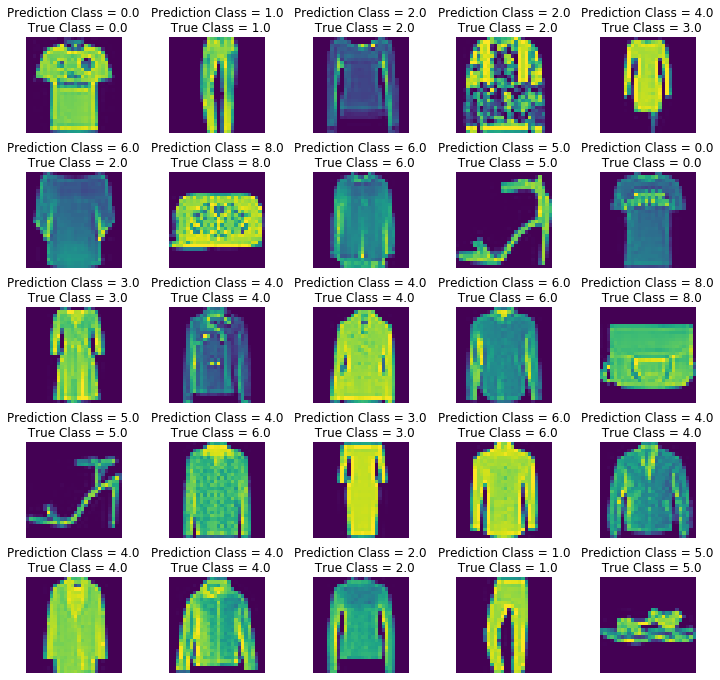

In [89]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # flatten the array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n  True Class = {:0.1f}".format(predict_classes[i], y_test[i]))#so it indicate our predicted as well as true value
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

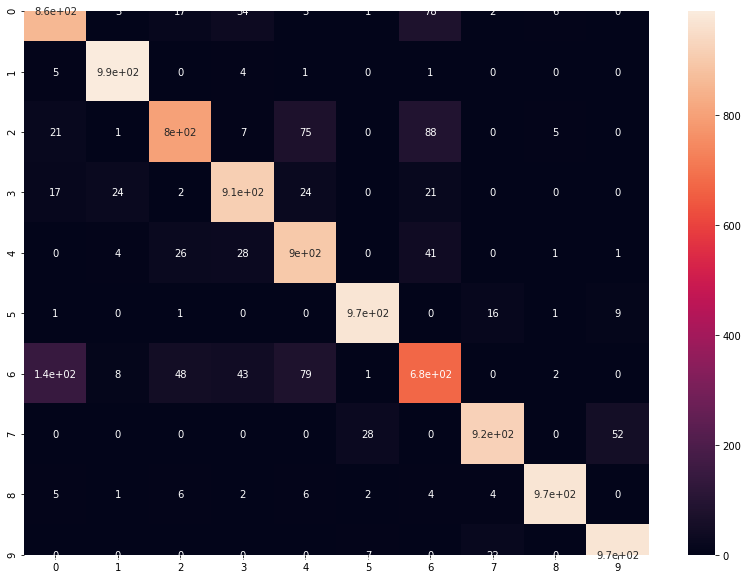

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)
# Sum the diagonal element to get the total true correct values

In [83]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
    
print(classification_report(y_test, predict_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.86      0.84      1000
     Class 1       0.96      0.99      0.97      1000
     Class 2       0.89      0.80      0.84      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.83      0.90      0.86      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.74      0.68      0.71      1000
     Class 7       0.95      0.92      0.94      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

